<a href="https://colab.research.google.com/github/Manisha-Karim/Covid-19-Mortality-Prediction/blob/main/Covid_19_Patient_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [3]:
from sklearn.feature_selection import VarianceThreshold

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/Mortality_incidence_sociodemographic_and_clinical_data_in_COVID19_patients.xlsx")

In [6]:
df.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [7]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

Derivation cohort        0.0
Sodium < 139 or > 154    0.0
ALT                      0.0
ALTYes                   0.0
AST > 40                 0.0
                        ... 
AgeScore                 0.0
Age.1                    0.0
OtherBrnLsn              0.0
OldOtherNeuro            0.0
Troponin > 0.1           0.0
Length: 85, dtype: float64

In [8]:
df.columns

Index(['Derivation cohort', 'LOS_Y', 'LOS', 'Death', 'Age', 'Severity',
       'Black', 'White', 'Asian', 'Latino', 'MI', 'PVD', 'CHF', 'CVD',
       'DEMENT', 'COPD', 'DM Complicated', 'DM Simple', 'Renal Disease',
       'All CNS', 'Pure CNS', 'Stroke', 'Seizure', 'OldSyncope',
       'OldOtherNeuro', 'OtherBrnLsn', 'Age.1', 'AgeScore', 'O2SatsYes',
       'OsSats', 'O2 Sat < 94', 'TempYes', 'Temp', 'Temp > 38', 'MapYes',
       'MAP', 'MAP < 70', 'DDimerYes', 'Ddimer', 'D-Dimer > 3', 'PltsYes',
       'Plts', 'PltsScore', 'INRYes', 'INR', 'INR > 1.2', 'BUNYes', 'BUN',
       'BUN > 30', 'CrtnYes', 'Creatinine', 'CrtnScore', 'SodimuYes', 'Sodium',
       'Sodium < 139 or > 154', 'GlucoseYese', 'Glucose',
       'Glucose <60 or > 500', 'ASTYes', 'AST', 'AST > 40', 'ALTYes', 'ALT',
       'ALT > 40', 'WBCYes', 'WBC', 'WBC <1.8 or > 4.8', 'LymphoYes', 'Lympho',
       'Lymphocytes < 1', 'IL6Yes', 'IL6', 'IL6 > 150', 'FerritinYes',
       'Ferritin', 'Ferritin > 300', 'CrctProtYes', 'Crc

In [9]:
df.drop(['FerritinYes', 'O2SatsYes','O2 Sat < 94', 'AgeScore', 'Age','TempYes','Temp > 38',
          'MapYes','MAP < 70', 'DDimerYes','D-Dimer > 3', 'PltsYes','PltsScore', 'INRYes',
          'INR > 1.2', 'BUNYes', 'BUN > 30', 'CrtnYes','CrtnScore', 'SodimuYes',
          'Sodium < 139 or > 154', 'GlucoseYese','Glucose <60 or > 500', 'ASTYes', 'AST > 40',
          'ALT > 40',  'ALTYes', 'WBCYes', 'WBC <1.8 or > 4.8', 'LymphoYes','Lymphocytes < 1', 'IL6Yes',
          'IL6 > 150', 'FerritinYes','Ferritin > 300', 'CrctProtYes','C-Reactive Prot > 10', 'ProCalCYes',
          'Procalciton > 0.1', 'TropYes', 'Troponin > 0.1', 'LOS_Y'], axis = 1, inplace = True)

In [10]:
df.shape

(4711, 44)

In [11]:
df.head()

,Derivation cohort,LOS,Death,Severity,Black,White,Asian,Latino,MI,PVD,...,Glucose,AST,ALT,WBC,Lympho,IL6,Ferritin,CrctProtein,Procalcitonin,Troponin
0,1,1,0,3,0,0,0,0,0,0,...,112.0,26.0,14.0,5.6,1.4,0.0,0.0,0.4999,0.0,0.01
1,1,2,1,7,0,1,0,0,0,1,...,265.0,85.0,32.0,12.2,0.3,0.0,885.0,14.9000,0.6,1.20
2,1,2,1,7,0,1,0,0,0,1,...,121.0,32.0,18.0,6.1,0.5,324.1,629.0,33.9000,1.2,0.00
3,1,15,0,9,1,0,0,0,1,0,...,0.0,44.0,17.0,3.7,0.5,0.0,816.0,18.4000,7.3,0.05
4,1,9,0,7,1,0,0,0,0,0,...,0.0,38.0,28.0,5.7,1.4,39.4,1691.0,11.6000,0.0,0.01


In [12]:
X = df.drop('Death', axis = 1)
y = df['Death']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0, stratify = y)

In [14]:
var_thresh = VarianceThreshold(threshold = 0.01)
var_thresh.fit(X_train)

over_thresh = X_train.columns[var_thresh.get_support()]
constant = [column for column in X_train.columns
                     if column not in over_thresh]

constant

['Seizure', 'OtherBrnLsn']

In [15]:
X_train.drop(constant, axis = 1, inplace = True)
X_test.drop(constant, axis = 1, inplace = True)

In [16]:
X_train.shape, X_test.shape

((2826, 41), (1885, 41))

In [17]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [18]:
sel = f_classif(X_train, y_train)
sel

(array([8.60333605e+00, 4.39146189e+01, 6.61634767e+02, 1.18964305e+00,
        3.20568208e+00, 1.67578316e+00, 1.60124515e+00, 9.11285741e-01,
        1.39948425e+01, 2.17136436e+00, 3.48860112e+00, 2.26836318e+00,
        3.17112960e-01, 1.47252686e+00, 2.56192090e+00, 1.41303593e+01,
        2.47019682e+01, 1.83480400e+01, 9.62584558e+00, 5.29558827e-01,
        1.12820903e+00, 2.47680058e+02, 1.87897107e+01, 3.41237939e-02,
        2.08024815e+02, 7.98870846e+01, 1.12751970e+01, 1.09551629e+01,
        1.02517807e+02, 6.44918355e+01, 2.97997079e+00, 1.49692479e-01,
        2.27487508e+01, 5.00874431e+00, 1.58864339e+01, 4.60134175e-01,
        1.91660554e+00, 2.65173174e+01, 1.44543273e+02, 1.03997489e+02,
        4.91553403e+01]),
 array([3.38248501e-003, 4.09278329e-011, 2.85483121e-131, 2.75494623e-001,
        7.34899873e-002, 1.95591553e-001, 2.05831239e-001, 3.39855209e-001,
        1.86959415e-004, 1.40712895e-001, 6.18962805e-002, 1.32151133e-001,
        5.73392543e-001, 2

In [19]:
p_values = pd.Series(sel[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

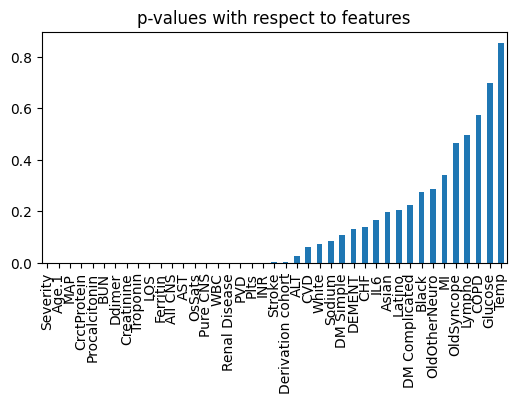

In [20]:
p_values.plot.bar(figsize = (6, 3))
plt.title('p-values with respect to features')
plt.show()

In [21]:
p_values = p_values[p_values<0.05]

In [22]:
X_train = X_train[p_values.index]
X_test = X_test[p_values.index]

In [23]:
X_train.shape, X_test.shape

((2826, 23), (1885, 23))

In [24]:
X_train.columns

Index(['Severity', 'Age.1', 'MAP', 'CrctProtein', 'Procalcitonin', 'BUN',
       'Ddimer', 'Creatinine', 'Troponin', 'LOS', 'Ferritin', 'All CNS', 'AST',
       'OsSats', 'Pure CNS', 'WBC', 'Renal Disease', 'PVD', 'Plts', 'INR',
       'Stroke', 'Derivation cohort', 'ALT'],
      dtype='object')

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

In [26]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
balanced = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train, y_train = balanced.fit_resample(X_train,y_train)

In [27]:
clf = DecisionTreeClassifier(random_state = 35)
clf_tree = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
acc = accuracy_score(y_test,yhat)

In [28]:
acc

0.7374005305039788

[Text(0.4077853442513369, 0.9782608695652174, 'Derivation cohort <= 3.5\ngini = 0.5\nsamples = 4228\nvalue = [2091, 2137]'),
 Text(0.20641887137630172, 0.9347826086956522, 'CHF <= 5.5\ngini = 0.397\nsamples = 1787\nvalue = [1299, 488]'),
 Text(0.09231635237827188, 0.8913043478260869, 'Derivation cohort <= 2.5\ngini = 0.263\nsamples = 974\nvalue = [822, 152]'),
 Text(0.07036307345904869, 0.8478260869565217, 'LOS <= 77.5\ngini = 0.154\nsamples = 668\nvalue = [612, 56]'),
 Text(0.06079369546861807, 0.8043478260869565, 'MI <= 3.046\ngini = 0.131\nsamples = 654\nvalue = [608, 46]'),
 Text(0.0484097945398255, 0.7608695652173914, 'White <= 2.039\ngini = 0.112\nsamples = 639\nvalue = [601, 38]'),
 Text(0.03490008443568815, 0.717391304347826, 'LOS <= 69.5\ngini = 0.095\nsamples = 621\nvalue = [590, 31]'),
 Text(0.02476780185758514, 0.6739130434782609, 'OldSyncope <= 0.5\ngini = 0.059\nsamples = 559\nvalue = [542, 17]'),
 Text(0.019138755980861243, 0.6304347826086957, 'Asian <= 45.5\ngini = 0.04

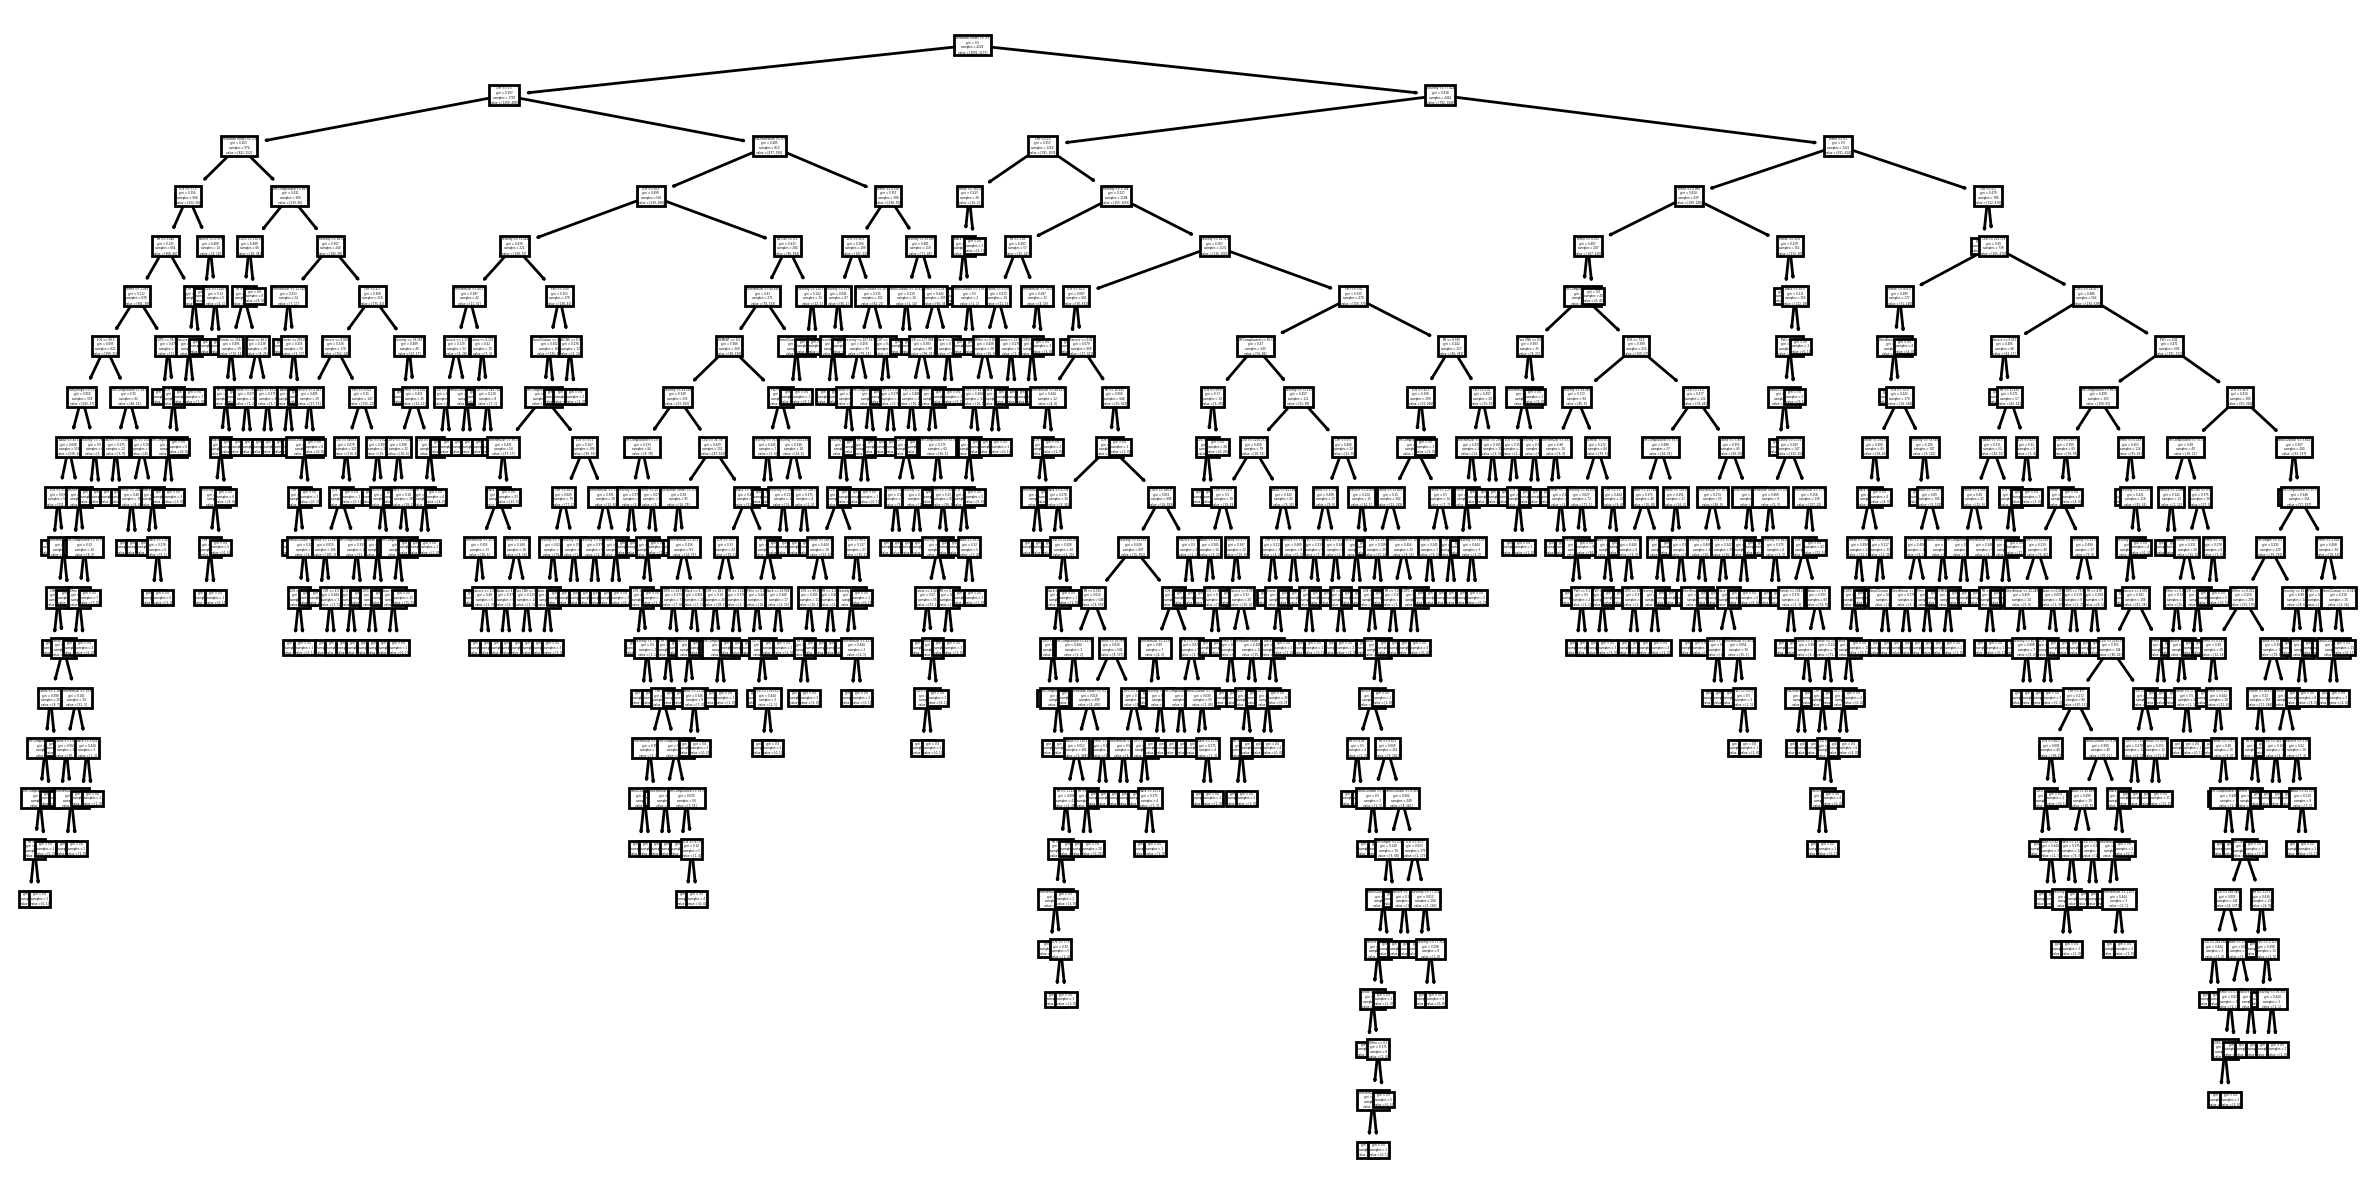

In [29]:
plt.figure(figsize = (15,7.5),dpi =200)
plot_tree(clf_tree,
          feature_names= X.columns
          )

In [30]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [31]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07904903755348619


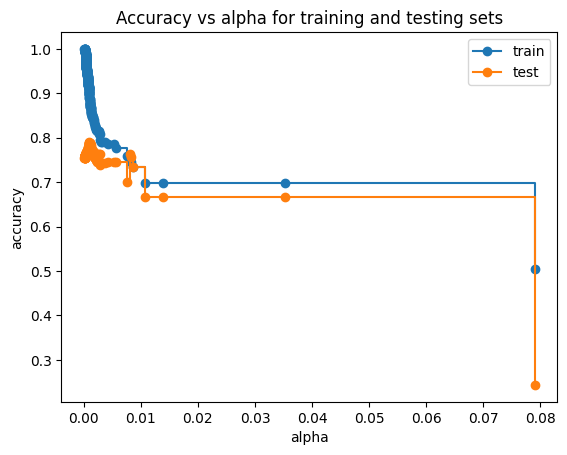

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [33]:
clf = DecisionTreeClassifier(random_state = 35, ccp_alpha = 0.003)
clf_tree = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
acc = accuracy_score(y_test,yhat)

In [34]:
acc

0.7427055702917772

[Text(0.3854166666666667, 0.9166666666666666, 'Derivation cohort <= 3.5\ngini = 0.5\nsamples = 4228\nvalue = [2091, 2137]'),
 Text(0.16666666666666666, 0.75, 'CHF <= 5.5\ngini = 0.397\nsamples = 1787\nvalue = [1299, 488]'),
 Text(0.08333333333333333, 0.5833333333333334, 'Derivation cohort <= 2.5\ngini = 0.263\nsamples = 974\nvalue = [822, 152]'),
 Text(0.041666666666666664, 0.4166666666666667, 'gini = 0.154\nsamples = 668\nvalue = [612, 56]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.431\nsamples = 306\nvalue = [210, 96]'),
 Text(0.25, 0.5833333333333334, 'OldOtherNeuro <= 0.5\ngini = 0.485\nsamples = 813\nvalue = [477, 336]'),
 Text(0.20833333333333334, 0.4166666666666667, 'LOS <= 58.5\ngini = 0.499\nsamples = 505\nvalue = [239, 266]'),
 Text(0.16666666666666666, 0.25, 'Severity <= 72.624\ngini = 0.439\nsamples = 221\nvalue = [149, 72]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.353\n

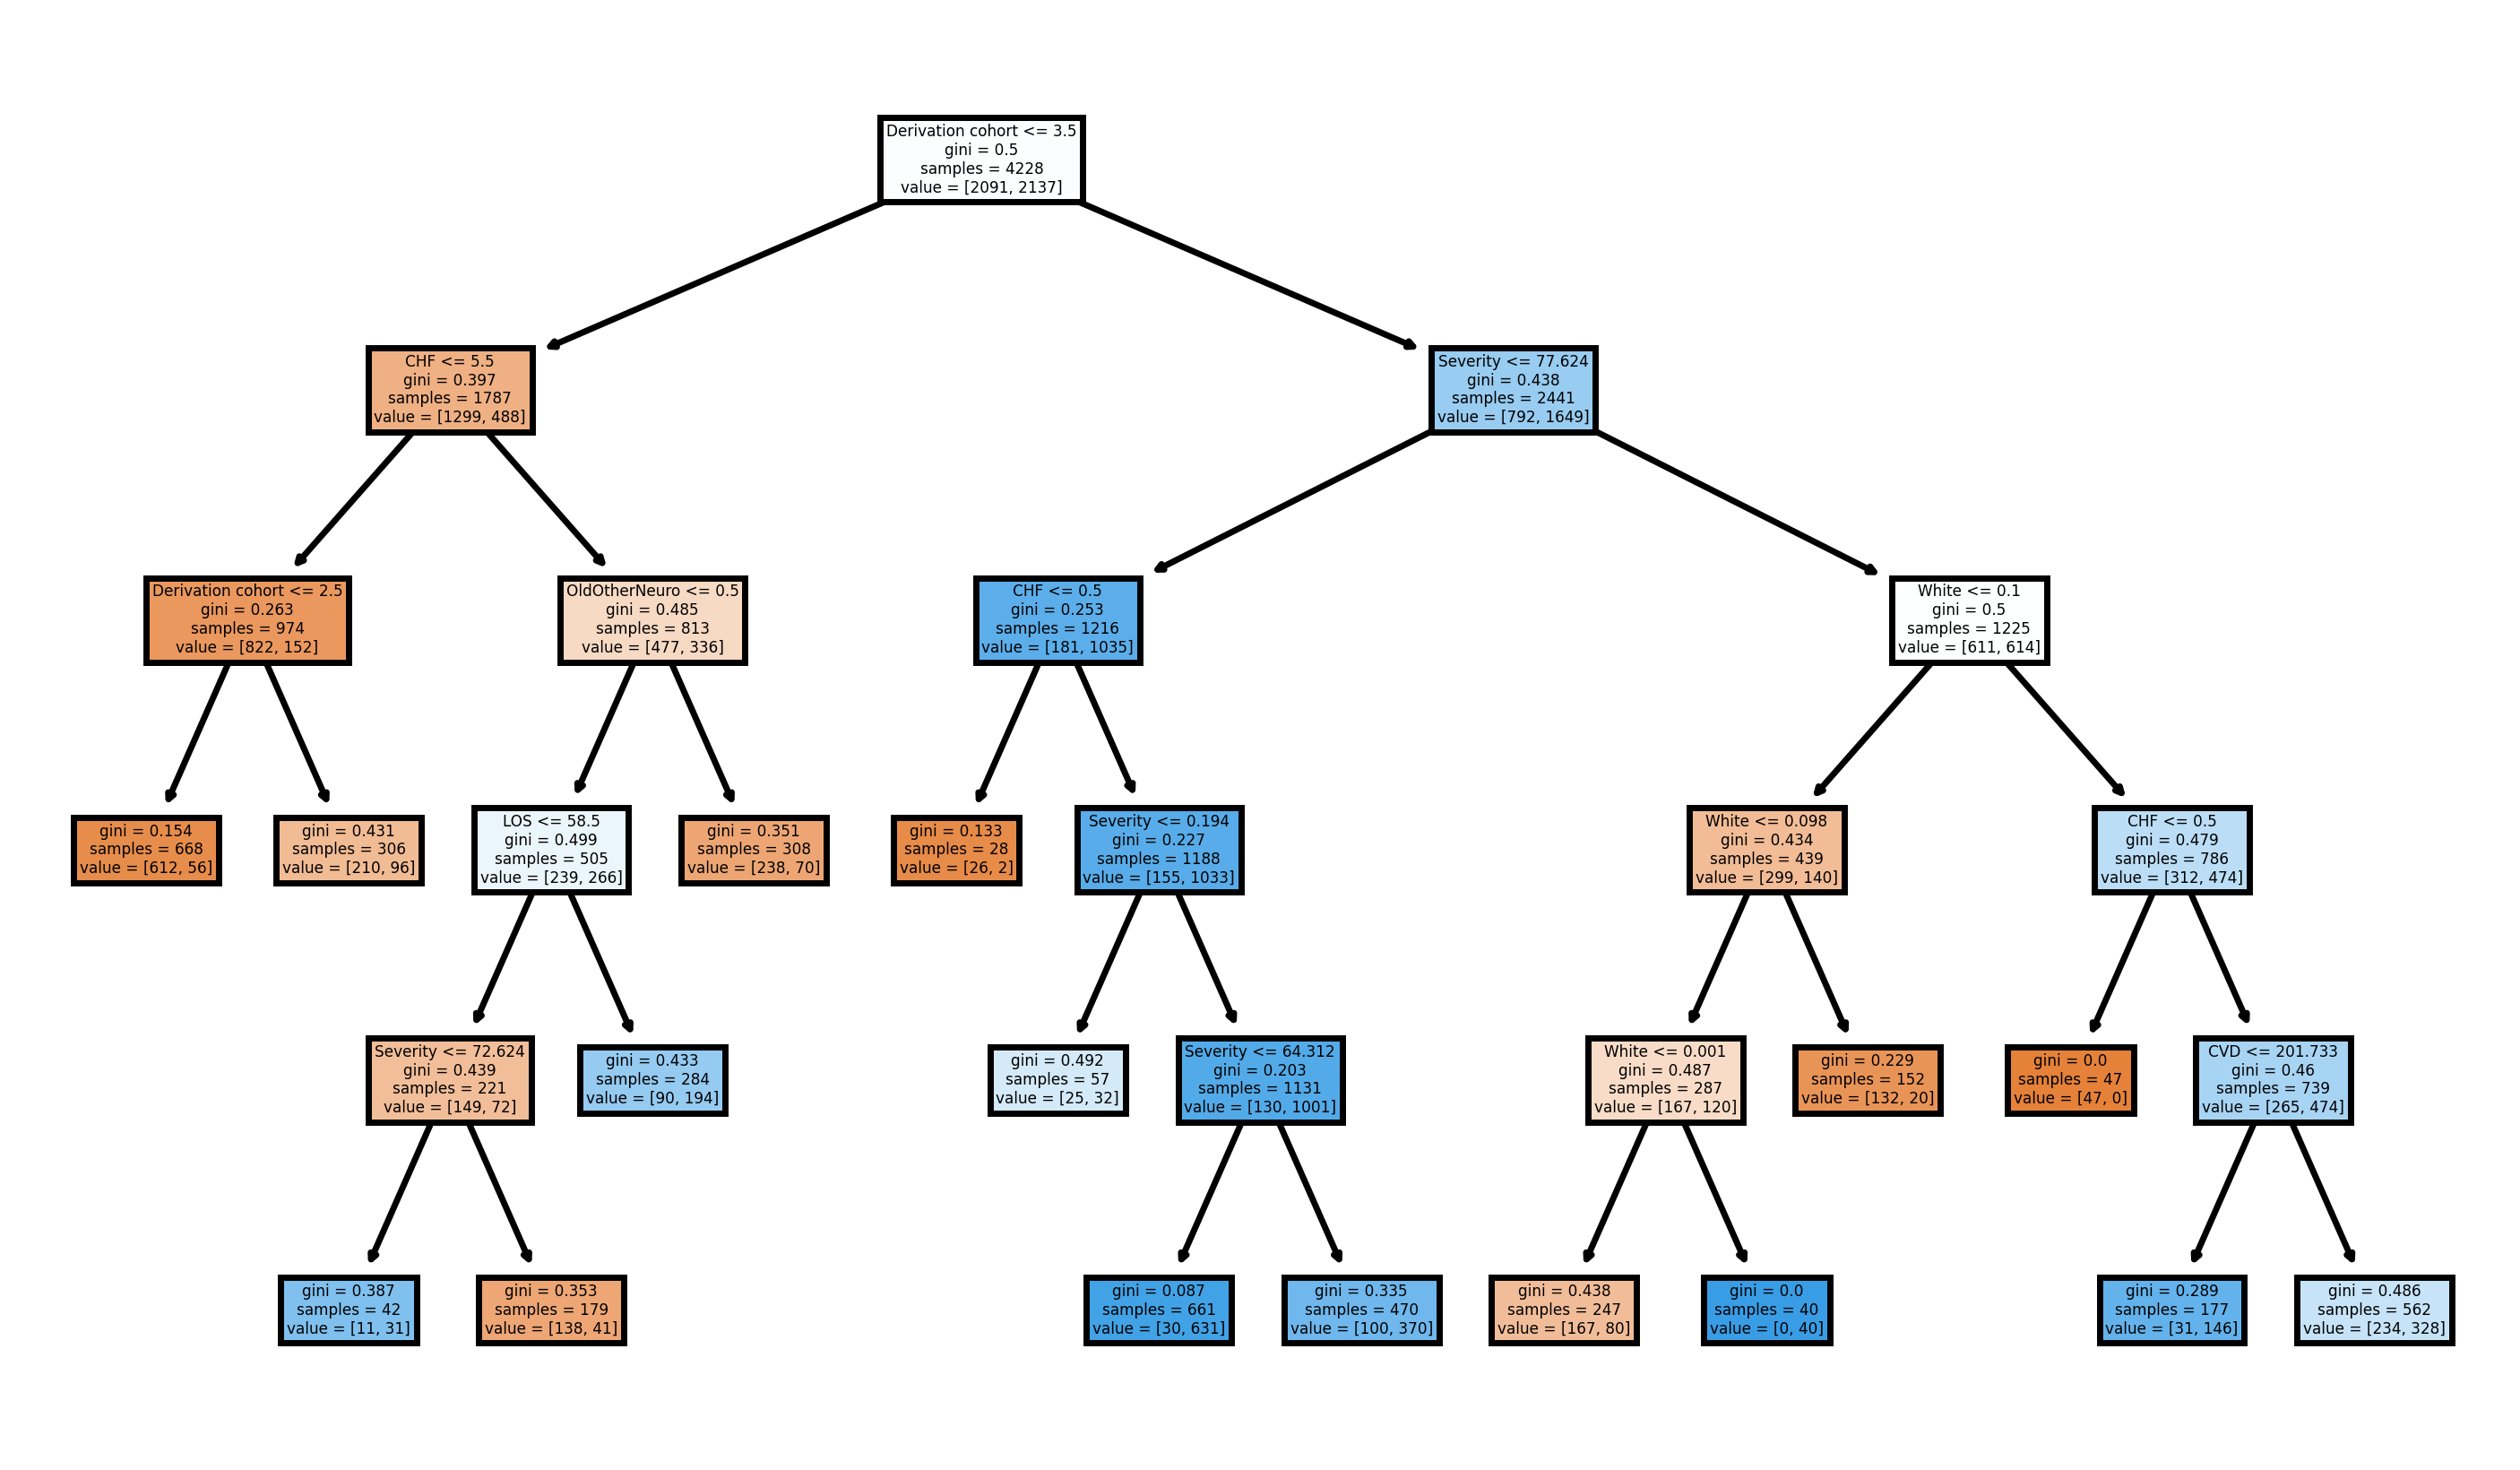

In [37]:
plt.figure(figsize = (7,4),dpi =500)
plot_tree(clf_tree,
          feature_names= X.columns,
          filled = True
          )